In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
def getModelError(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return classification_report(y_test, y_predict)
    
def compareModels(model, uModel, X, y):
    model_error = getModelError(model, X_train, X_test, y_train, y_test)
    uModel_error = getModelError(uModel, X_train, X_test, y_train, y_test)
    print('Ошибка на пакетной модели\n', model_error)
    print('Ошибка на реализованной модели\n', uModel_error)

In [3]:
data_1 = pd.read_csv('DATA/hearing_test.csv')

In [4]:
data_1['test_result'] = data_1['test_result'].map({1: 1, 0: -1})

In [5]:
data_1 = data_1.iloc[:500]

<Axes: xlabel='age', ylabel='physical_score'>

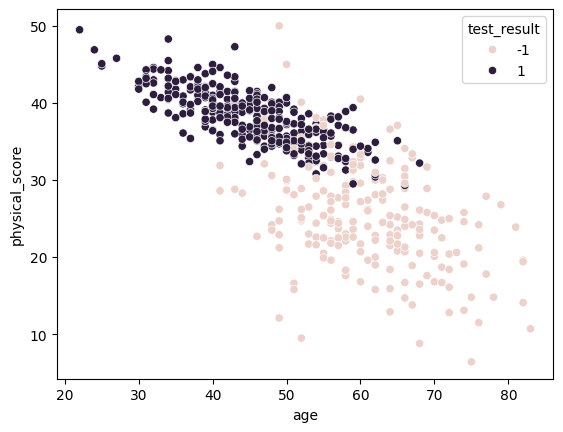

In [6]:
sns.scatterplot(data_1, x='age', y='physical_score', hue='test_result')

In [7]:
X = data_1.drop('test_result', axis=1)
y = data_1['test_result']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = SVC(kernel='linear')
uModel = USVC(max_iter=10000)

In [13]:
compareModels(model, uModel, X, y)

Ошибка на пакетной модели
               precision    recall  f1-score   support

          -1       0.93      0.93      0.93        68
           1       0.94      0.94      0.94        82

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150

Ошибка на реализованной модели
               precision    recall  f1-score   support

          -1       0.93      0.93      0.93        68
           1       0.94      0.94      0.94        82

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150

